<a href="https://colab.research.google.com/github/Pratik1Bhuwad/Employee_Attrition_Prediction_using_Deep_Learning/blob/main/Employee_Attrition_Prediction_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('employee_attrition.csv')
df.head()

,EmployeeID,Age,Gender,Country,Department,JobLevel,YearsAtCompany,MonthlyIncome,NumProjects,LastEvaluationScore,SatisfactionLevel,AvgWorkHoursPerWeek,PromotedLast5Years,HasMentor,RemoteWork,TrainingHours,Certifications,LeavesTaken,FeedbackScore,Attrition
0,1,50.0,Female,UK,Development,Junior,19,124815.0,7,0.44,2,54,1,1,1,9,3,21,4.4,0
1,2,36.0,Other,UK,Support,Mid,4,49908.0,6,0.76,2,52,0,0,1,67,1,5,1.4,0
2,3,29.0,Male,USA,Sales,Mid,4,115651.0,9,0.81,4,43,0,1,0,98,0,3,4.3,0
3,4,42.0,Male,Canada,Marketing,Senior,3,36728.0,8,0.66,1,57,1,1,1,14,0,18,4.7,1
4,5,40.0,Female,UK,Support,Junior,17,37855.0,9,0.89,2,41,1,1,0,58,0,21,1.8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EmployeeID           35000 non-null  int64  
 1   Age                  33950 non-null  float64
 2   Gender               35000 non-null  object 
 3   Country              35000 non-null  object 
 4   Department           35000 non-null  object 
 5   JobLevel             35000 non-null  object 
 6   YearsAtCompany       35000 non-null  int64  
 7   MonthlyIncome        33950 non-null  float64
 8   NumProjects          35000 non-null  int64  
 9   LastEvaluationScore  33950 non-null  float64
 10  SatisfactionLevel    35000 non-null  int64  
 11  AvgWorkHoursPerWeek  35000 non-null  int64  
 12  PromotedLast5Years   35000 non-null  int64  
 13  HasMentor            35000 non-null  int64  
 14  RemoteWork           35000 non-null  int64  
 15  TrainingHours        35000 non-null 

In [ ]:
df.isnull().sum()

,0
EmployeeID,0
Age,1050
Gender,0
Country,0
Department,0
JobLevel,0
YearsAtCompany,0
MonthlyIncome,1050
NumProjects,0
LastEvaluationScore,1050


In [ ]:
# mean,median:40 & mode is 34 (Age)
# mean & median:90158.5 (MonthlyIncome)
# mean,median:0.7 & mode is 0.6 (LastEvaluationScore)

In [ ]:
df['LastEvaluationScore'].mean()

np.float64(0.7009935198821797)

In [ ]:
df['LastEvaluationScore'].median()

0.7

In [ ]:
df['LastEvaluationScore'].mode()

,LastEvaluationScore
0,0.68


In [ ]:
for col in ['Age','MonthlyIncome','LastEvaluationScore']:
    df[col].fillna(df[col].median(),inplace=True)

In [ ]:
df.isnull().sum()

,0
EmployeeID,0
Age,0
Gender,0
Country,0
Department,0
JobLevel,0
YearsAtCompany,0
MonthlyIncome,0
NumProjects,0
LastEvaluationScore,0


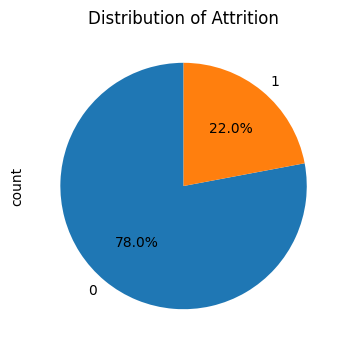

In [ ]:
plt.figure(figsize=(6,4))
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Attrition')
plt.show()

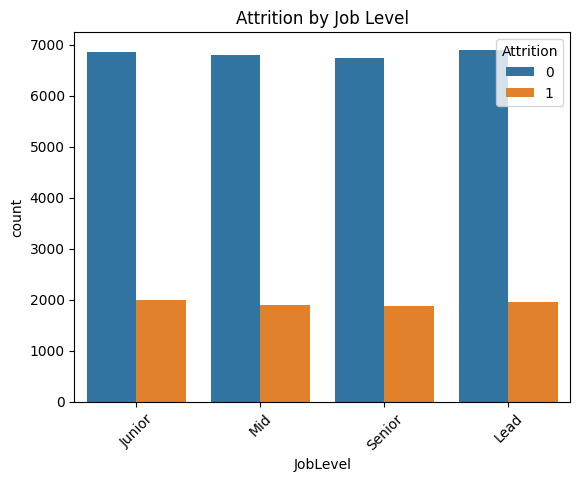

In [ ]:
sns.countplot(x='JobLevel',hue='Attrition',data=df)
plt.title('Attrition by Job Level')
plt.xticks(rotation=45)
plt.show()

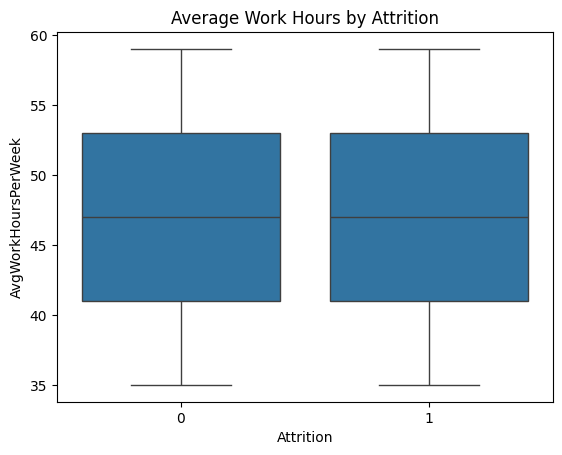

In [ ]:
sns.boxplot(x='Attrition',y='AvgWorkHoursPerWeek',data=df)
plt.title('Average Work Hours by Attrition')
plt.show()

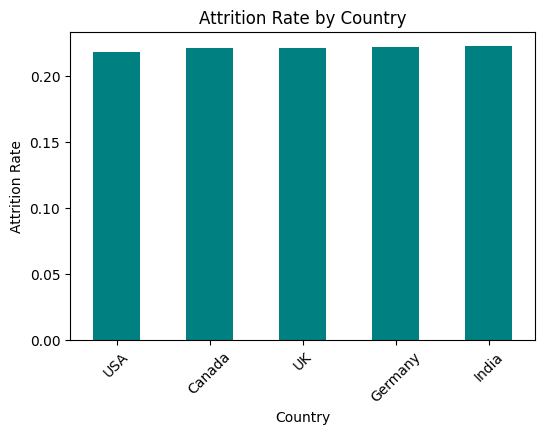

In [ ]:
plt.figure(figsize=(6,4))
country_churn=df.groupby('Country')['Attrition'].mean().sort_values()
country_churn.plot(kind='bar',color='teal')
plt.xlabel('Country')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Country')
plt.xticks(rotation=45)
plt.show()

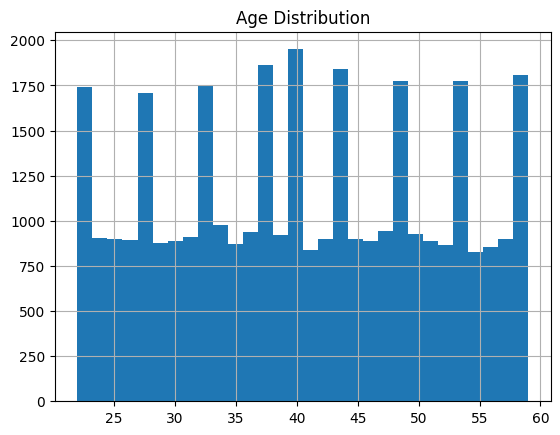

In [ ]:
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.show()

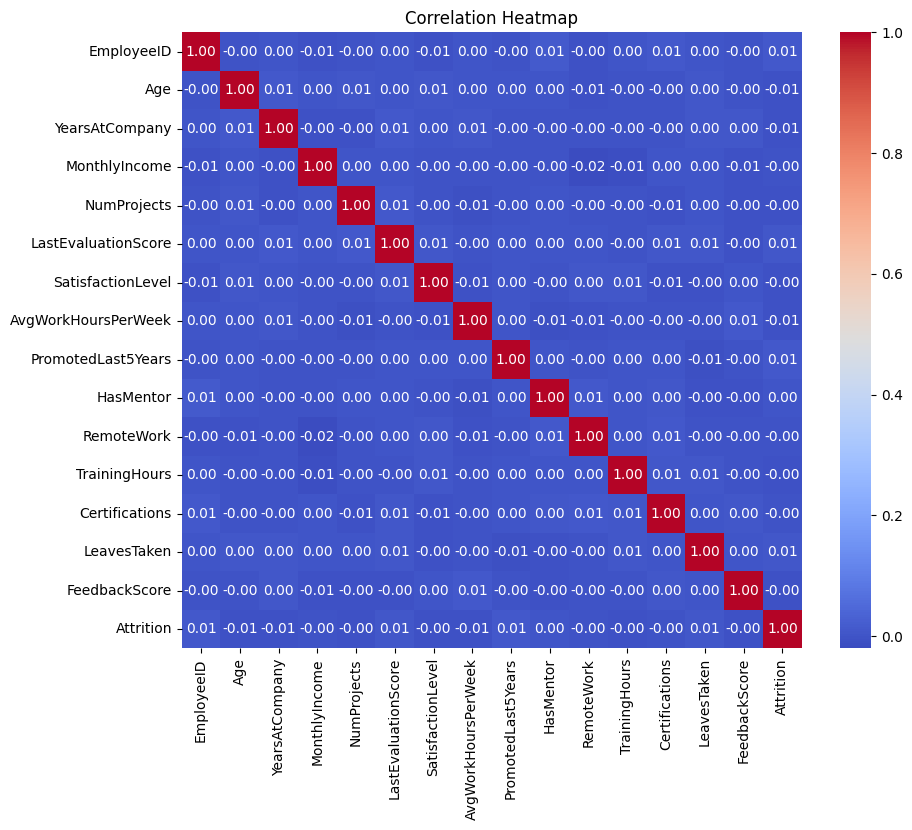

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

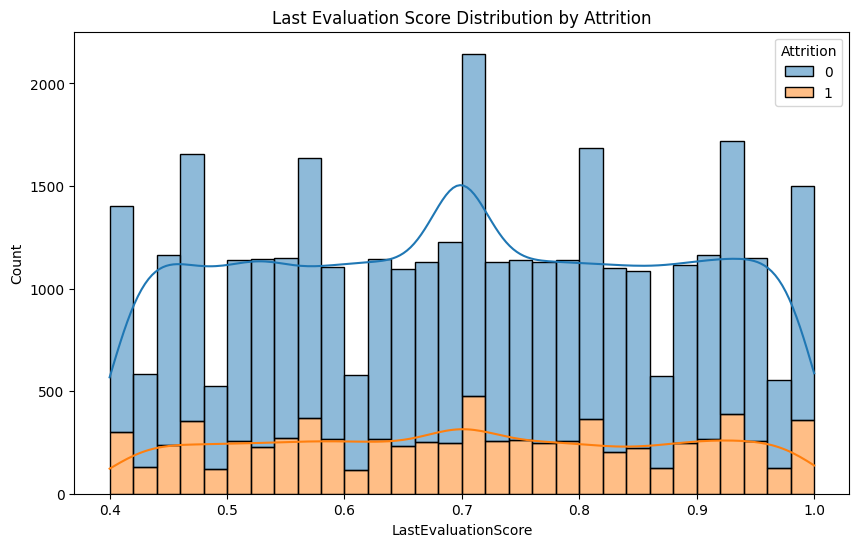

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='LastEvaluationScore',hue='Attrition',multiple='stack',bins=30,kde=True)
plt.title('Last Evaluation Score Distribution by Attrition')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_label=['Gender','Country','Department','JobLevel']
df[categorical_label]=df[categorical_label].apply(LabelEncoder().fit_transform)

In [ ]:
df.drop('EmployeeID',inplace=True,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  35000 non-null  float64
 1   Gender               35000 non-null  int64  
 2   Country              35000 non-null  int64  
 3   Department           35000 non-null  int64  
 4   JobLevel             35000 non-null  int64  
 5   YearsAtCompany       35000 non-null  int64  
 6   MonthlyIncome        35000 non-null  float64
 7   NumProjects          35000 non-null  int64  
 8   LastEvaluationScore  35000 non-null  float64
 9   SatisfactionLevel    35000 non-null  int64  
 10  AvgWorkHoursPerWeek  35000 non-null  int64  
 11  PromotedLast5Years   35000 non-null  int64  
 12  HasMentor            35000 non-null  int64  
 13  RemoteWork           35000 non-null  int64  
 14  TrainingHours        35000 non-null  int64  
 15  Certifications       35000 non-null 

---
split the original data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
len(x_train),len(x_test)

(28000, 7000)



---

Apply scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

scaler.fit(x_train)

StandardScaler()

In [ ]:
# Transform both training and testing data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# The transformed data is a NumPy array. Convert it back to a DataFrame using original column names.
X_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
X_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(X_train_scaled_df.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train_scaled_df,y_train,epochs=10,validation_split=0.2,batch_size=32)

Epoch 1/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7759 - loss: 0.5424 - val_accuracy: 0.7829 - val_loss: 0.5289
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7775 - loss: 0.5298 - val_accuracy: 0.7829 - val_loss: 0.5288
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7805 - loss: 0.5222 - val_accuracy: 0.7829 - val_loss: 0.5285
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7741 - loss: 0.5302 - val_accuracy: 0.7829 - val_loss: 0.5303
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7802 - loss: 0.5191 - val_accuracy: 0.7829 - val_loss: 0.5308
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7751 - loss: 0.5221 - val_accuracy: 0.7829 - val_loss: 0.5299
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7772 - loss: 0.5184 - val_accuracy: 0.7829 - val_loss: 0.5345
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7809 - loss: 0.5104 - val_accuracy: 0.

In [ ]:
loss, acc = model.evaluate(X_test_scaled_df, y_test)
print(f'Accuracy Score: {acc*100:.2f}%')

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7739 - loss: 0.5507
Accuracy Score: 78.00%


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

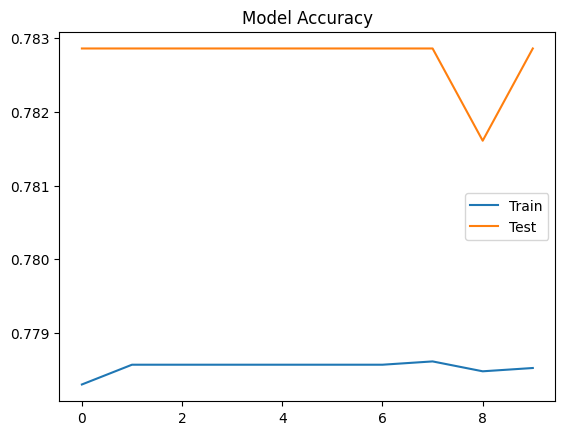

In [ ]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Test')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
len(x_train),len(x_test)

(28000, 7000)



---

Performance Summary

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


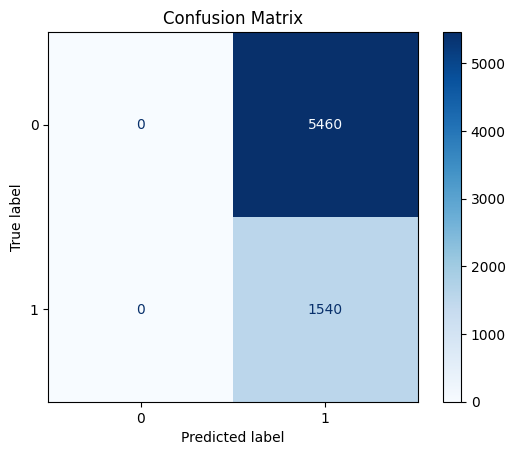

In [ ]:
ypred=(model.predict(x_test)>0.5).astype(int)
cm=confusion_matrix(y_test,ypred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()